In [3]:
#Import Libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import warnings
warnings.filterwarnings("ignore")


#Connect to Google Drive
from google.colab import drive
drive.mount('/content/gdrive')

#Load data
store_df = pd.read_csv('/content/gdrive/MyDrive/SuperStoreSales_Whole.csv')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [37]:
#Check data
store_df.head(10)


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Year
12,13,CA-2018-114412,2018-04-15,4/20/2018,Standard Class,AA-10480,Andrew Allen,Consumer,United States,Concord,...,South,OFF-PA-10002365,Office Supplies,Paper,Xerox 1967,15.552,3,0.2,5.4432,2018
23,24,US-2018-156909,2018-07-16,7/18/2018,Second Class,SF-20065,Sandra Flanagan,Consumer,United States,Philadelphia,...,East,FUR-CH-10002774,Furniture,Chairs,"Global Deluxe Stacking Chair, Gray",71.372,2,0.3,-1.0196,2018
34,35,CA-2018-107727,2018-10-19,10/23/2018,Second Class,MA-17560,Matt Abelman,Home Office,United States,Houston,...,Central,OFF-PA-10000249,Office Supplies,Paper,Easy-staple paper,29.472,3,0.2,9.9468,2018
41,42,CA-2018-120999,2018-10-09,9/15/2018,Standard Class,LC-16930,Linda Cazamias,Corporate,United States,Naperville,...,Central,TEC-PH-10004093,Technology,Phones,Panasonic Kx-TS550,147.168,4,0.2,16.5564,2018
43,44,CA-2018-139619,2018-09-19,9/23/2018,Standard Class,ES-14080,Erin Smith,Corporate,United States,Melbourne,...,South,OFF-ST-10003282,Office Supplies,Storage,"Advantus 10-Drawer Portable Organizer, Chrome ...",95.616,2,0.2,9.5616,2018
71,72,CA-2018-114440,2018-09-14,9/17/2018,Second Class,TB-21520,Tracy Blumstein,Consumer,United States,Jackson,...,Central,OFF-PA-10004675,Office Supplies,Paper,Telephone Message Books with Fax/Mobile Sectio...,19.050,3,0.0,8.7630,2018
75,76,US-2018-118038,2018-09-12,11/12/2018,First Class,KB-16600,Ken Brennan,Corporate,United States,Houston,...,Central,OFF-BI-10004182,Office Supplies,Binders,Economy Binders,1.248,3,0.8,-1.9344,2018
76,77,US-2018-118038,2018-09-12,11/12/2018,First Class,KB-16600,Ken Brennan,Corporate,United States,Houston,...,Central,FUR-FU-10000260,Furniture,Furnishings,"6"" Cubicle Wall Clock, Black",9.708,3,0.6,-5.8248,2018
77,78,US-2018-118038,2018-09-12,11/12/2018,First Class,KB-16600,Ken Brennan,Corporate,United States,Houston,...,Central,OFF-ST-10000615,Office Supplies,Storage,"SimpliFile Personal File, Black Granite, 15w x...",27.240,3,0.2,2.7240,2018
84,85,US-2018-119662,2018-11-13,11/16/2018,First Class,CS-12400,Christopher Schild,Home Office,United States,Chicago,...,Central,OFF-ST-10003656,Office Supplies,Storage,Safco Industrial Wire Shelving,230.376,3,0.2,-48.9549,2018


In [12]:
#Check dtype
store_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9800 non-null   int64         
 1   Order ID       9800 non-null   object        
 2   Order Date     9800 non-null   datetime64[ns]
 3   Ship Date      9800 non-null   object        
 4   Ship Mode      9800 non-null   object        
 5   Customer ID    9800 non-null   object        
 6   Customer Name  9800 non-null   object        
 7   Segment        9800 non-null   object        
 8   Country        9800 non-null   object        
 9   City           9800 non-null   object        
 10  State          9800 non-null   object        
 11  Postal Code    9789 non-null   float64       
 12  Region         9800 non-null   object        
 13  Product ID     9800 non-null   object        
 14  Category       9800 non-null   object        
 15  Sub-Category   9800 n

In [10]:
#Convert Order Date, create Year
store_df['Order Date'] = pd.to_datetime(store_df['Order Date'])
store_df['Year'] = store_df['Order Date'].dt.year

In [15]:
#Select 2018

year_select = 2018
store_df = store_df.loc[store_df['Year'] == year_select]

In [16]:
#Check null
store_df[['Order ID','Order Date','Customer ID','Sales']].isnull().sum()


Order ID       0
Order Date     0
Customer ID    0
Sales          0
dtype: int64

In [19]:
# filter columns
customer_df = store_df[['Order ID','Order Date','Customer ID','Sales']]
customer_df.info()
customer_df.head(10)

<class 'pandas.core.frame.DataFrame'>
Index: 3258 entries, 12 to 9790
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Order ID     3258 non-null   object        
 1   Order Date   3258 non-null   datetime64[ns]
 2   Customer ID  3258 non-null   object        
 3   Sales        3258 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 127.3+ KB


,Order ID,Order Date,Customer ID,Sales
12,CA-2018-114412,2018-04-15,AA-10480,15.552
23,US-2018-156909,2018-07-16,SF-20065,71.372
34,CA-2018-107727,2018-10-19,MA-17560,29.472
41,CA-2018-120999,2018-10-09,LC-16930,147.168
43,CA-2018-139619,2018-09-19,ES-14080,95.616
71,CA-2018-114440,2018-09-14,TB-21520,19.050
75,US-2018-118038,2018-09-12,KB-16600,1.248
76,US-2018-118038,2018-09-12,KB-16600,9.708
77,US-2018-118038,2018-09-12,KB-16600,27.240
84,US-2018-119662,2018-11-13,CS-12400,230.376


In [21]:
# Count CustomersID
customer_df['Customer ID'].nunique()


690

In [22]:
#Calculate the number for each customer
customer_df['Customer ID'].value_counts().head(20)


Customer ID
SV-20365    20
MH-18115    19
JL-15835    19
Dp-13240    19
LC-16870    17
SS-20140    16
AC-10615    16
DR-12880    15
DS-13030    15
EP-13915    15
JM-15250    15
RW-19540    14
KF-16285    14
RW-19690    14
BM-11650    14
FM-14290    13
CD-12280    13
CV-12805    13
JF-15190    12
SC-20380    12
Name: count, dtype: int64

In [23]:
# Create a function to get month from order_date
def getMonthYearOrder(x):
    return dt.datetime(x.year, x.month,1)


In [24]:
#Convert order_date, assign it order month
customer_df['Order Month'] = customer_df['Order Date'].apply(getMonthYearOrder)

In [25]:
# Grouping by customer_id and select order_month, Finding the first order date

customer_df['Cohort Month'] = customer_df.groupby('Customer ID')['Order Month'].transform('min')

In [28]:
#Creating function to return  month
def getMonth(column):
    return customer_df[column].dt.month

OrderMonth = getMonth('Order Month')
CohortMonth = getMonth('Cohort Month')

#  Get the  difference in month
month_diff = OrderMonth - CohortMonth

# Creating  Cohort Index
customer_df['CohortIndex'] = month_diff+1


In [30]:
# Counting number of unique customer_id in each group of CohortMonth and CohortIndex
cohort_df = customer_df.groupby(['Cohort Month',
                                 'Order Month',
                                 'CohortIndex'])['Customer ID'].nunique().reset_index()

def convert_datetostr(df, col):
    return df[col].dt.strftime('%Y-%m-%d')

cohort_df['Cohort Month'] = convert_datetostr(cohort_df, 'Cohort Month')
cohort_df['Order Month'] = convert_datetostr(cohort_df, 'Order Month')

# Adding column names to the dataframe created above
cohort_table = cohort_df.pivot(index='Cohort Month',
                               columns=['CohortIndex'],
                               values='Customer ID')


In [31]:
# Visualizations Cohort
def plot_heatmap(data, annot, color, format_values):
    plt.figure(figsize=(26,12))
    plt.title('SuperStore - Customer Retention: {}'.format(year_select),
              fontsize=16,
              fontweight='bold')
    ax = sns.heatmap(data,
                     annot=annot,
                     cmap=color,
                     cbar=False,
                     fmt=format_values)
    ax.xaxis.tick_top()


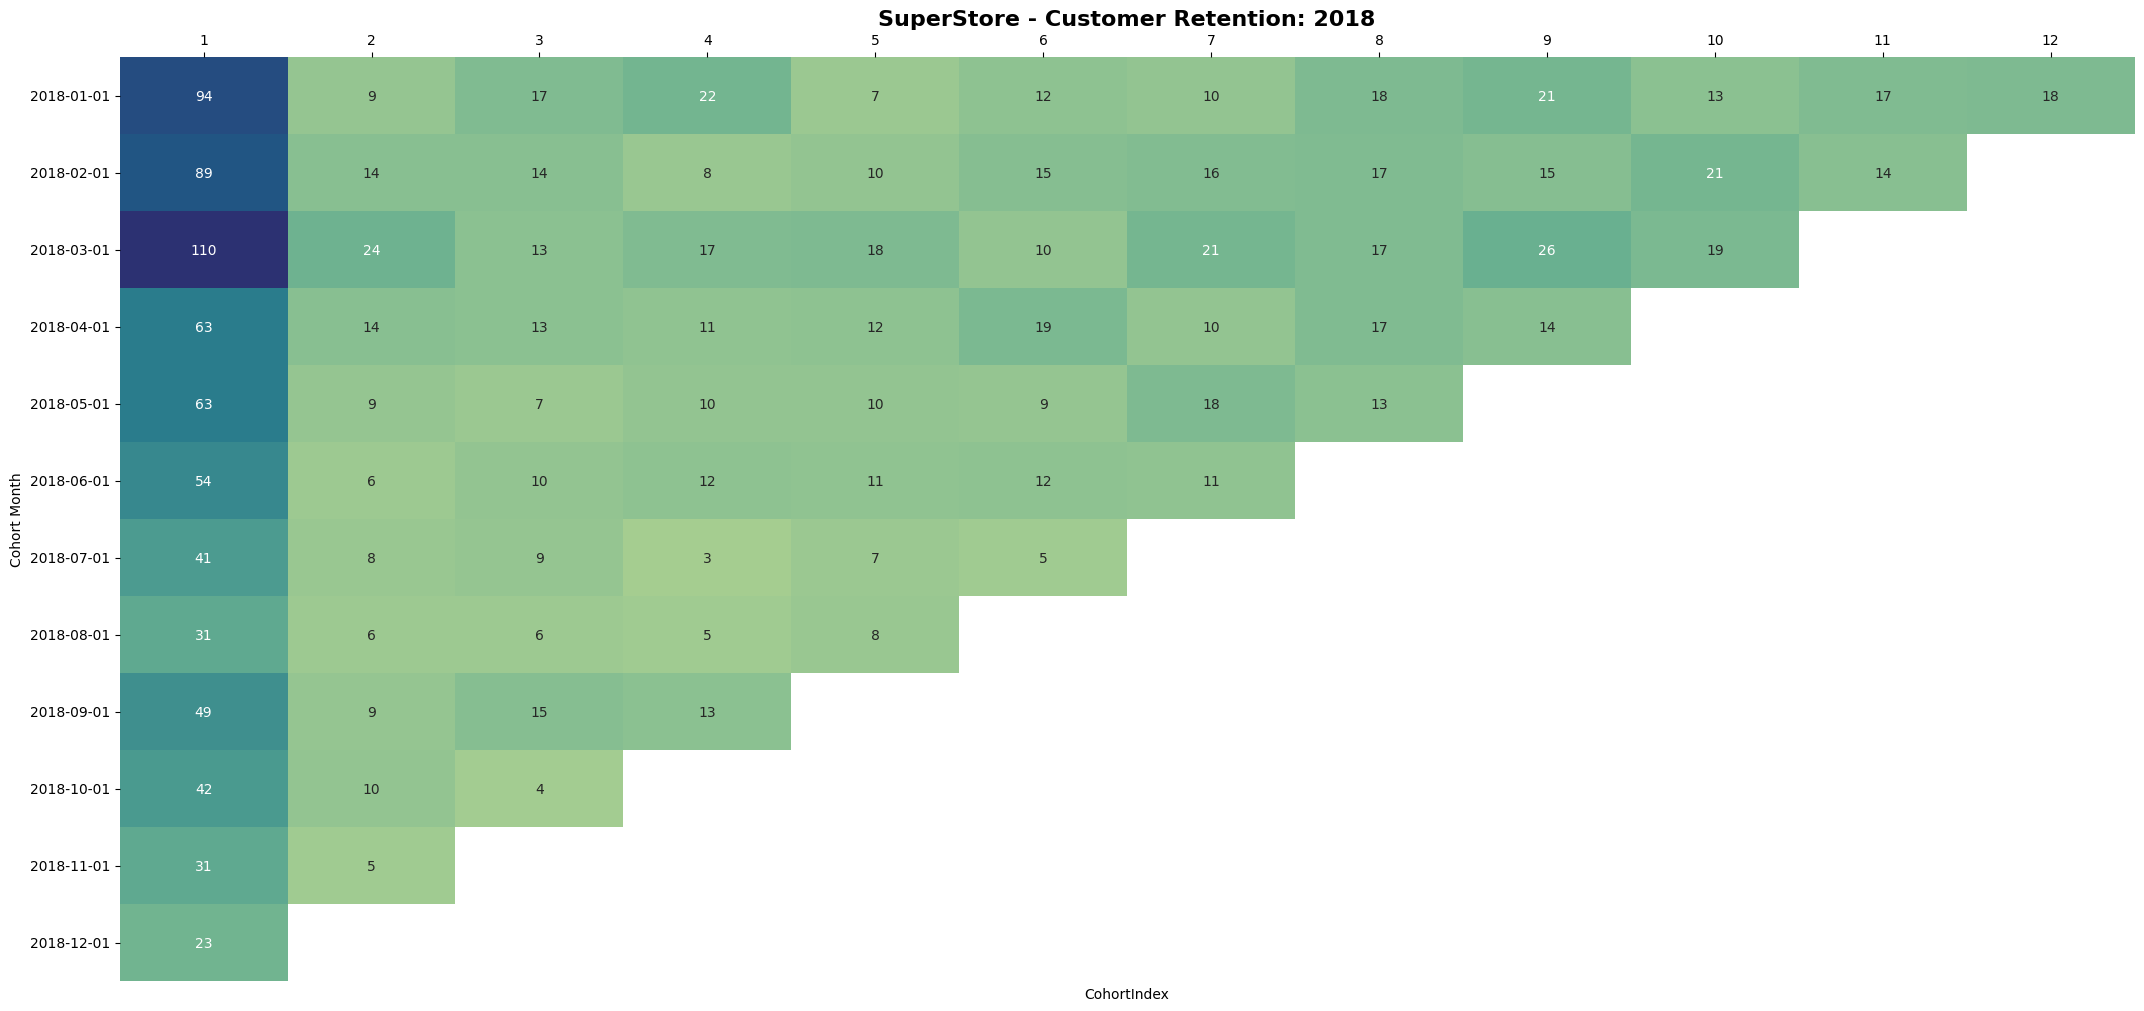

In [33]:
#plot
plot_heatmap(cohort_table, True, 'crest', ".0f")



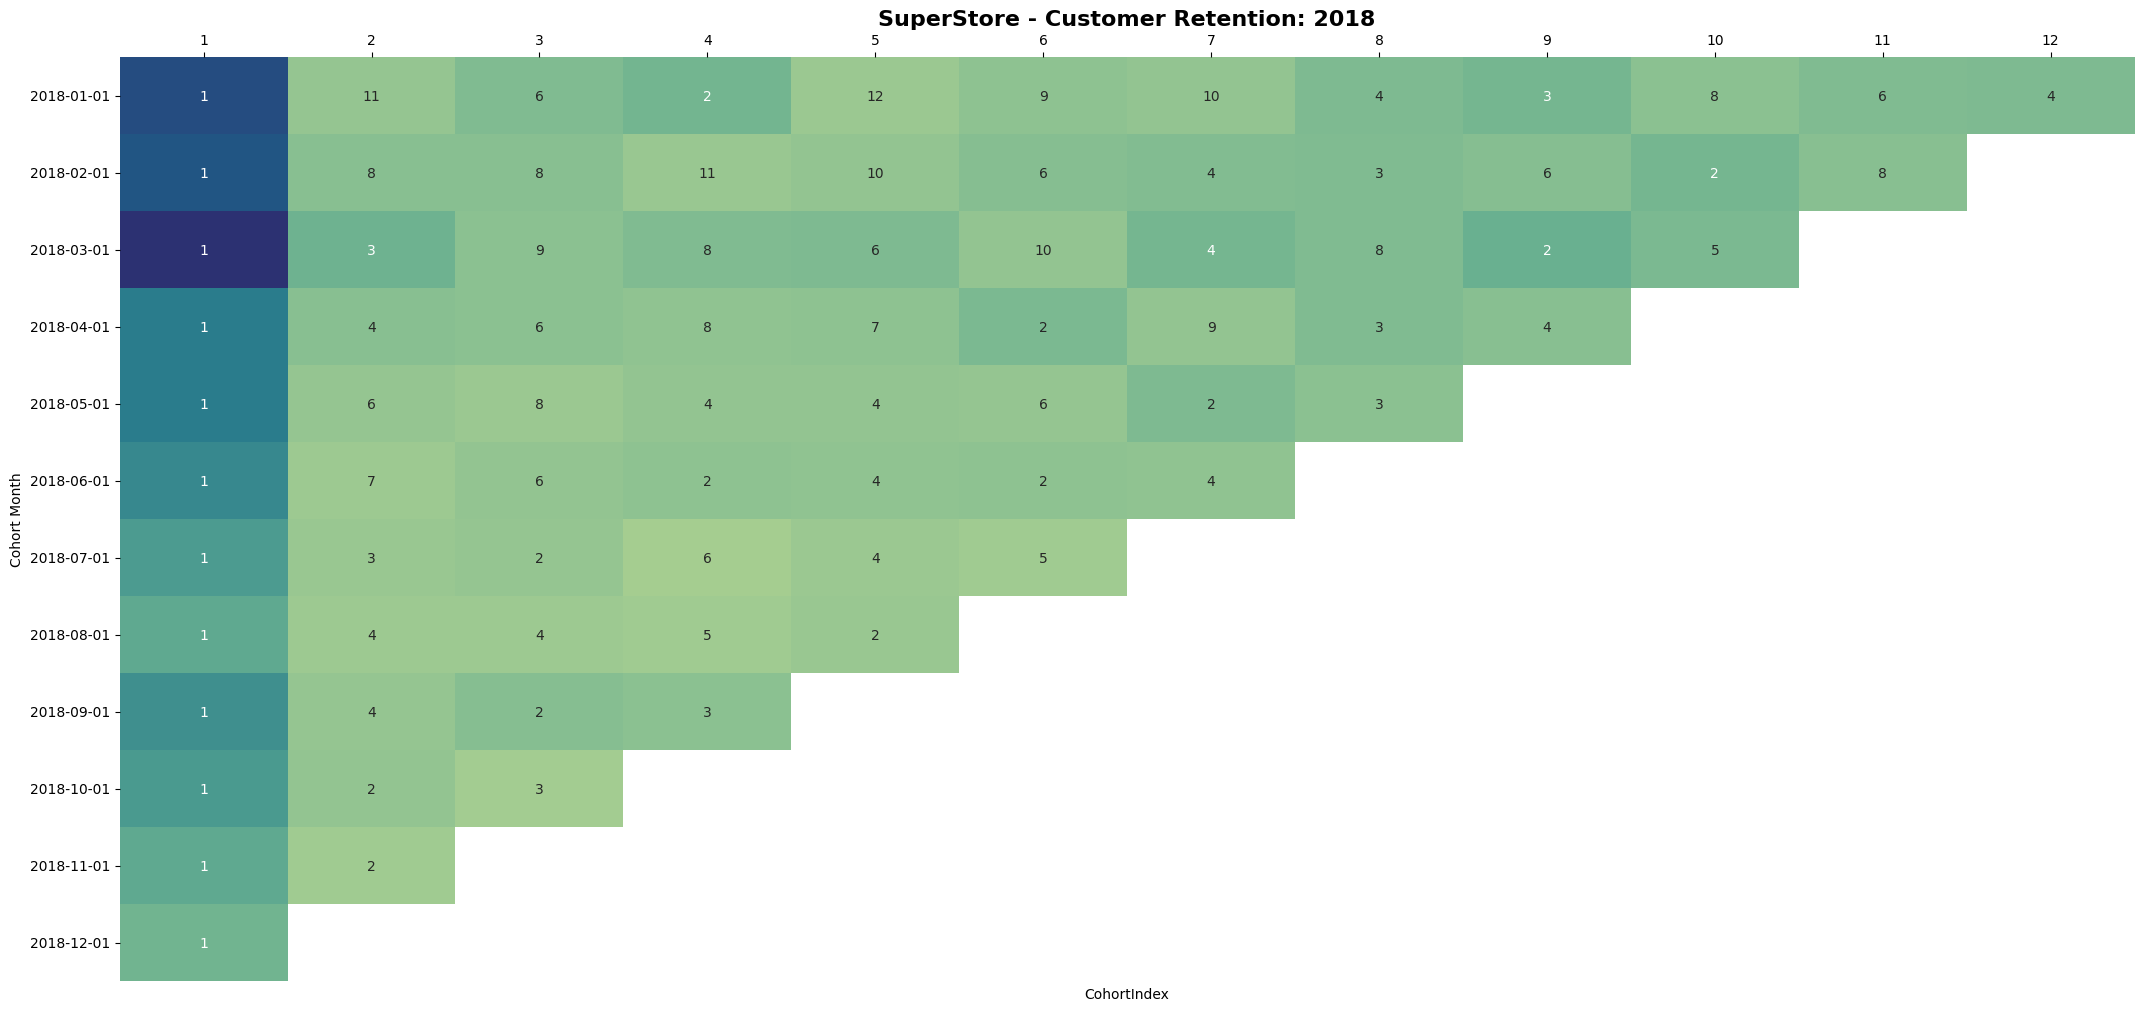

In [34]:
#plot as rank
plot_heatmap(cohort_table, cohort_table.rank(axis="columns", ascending=False), 'crest', ".0f")

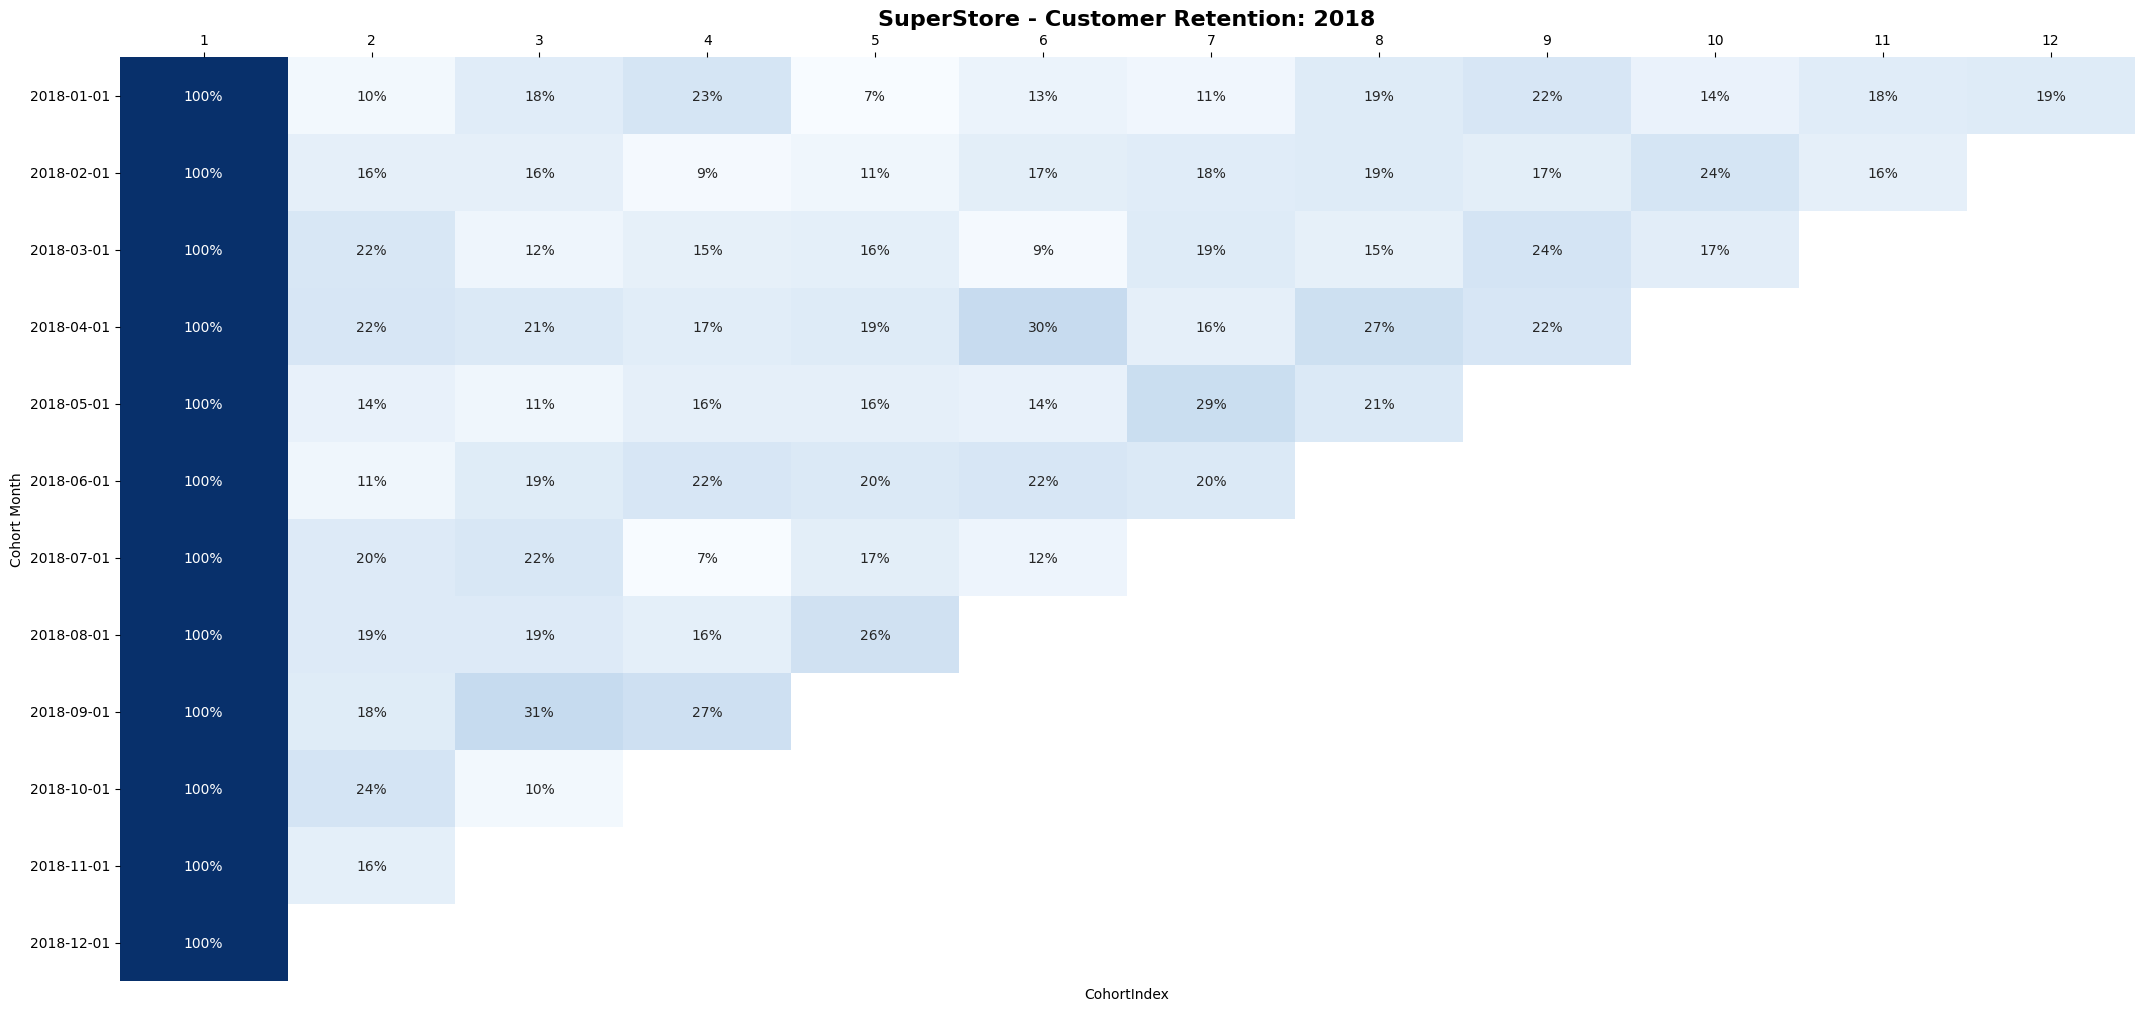

In [35]:
# Show Retention Rates as percentages
cohort_table.iloc[:,0]
cohort_table.divide(cohort_table.iloc[:,0], axis=0)

retention_rates = cohort_table.divide(cohort_table.iloc[:,0], axis=0)

#plot as percentages
plot_heatmap(retention_rates, True, 'Blues', ".0%")


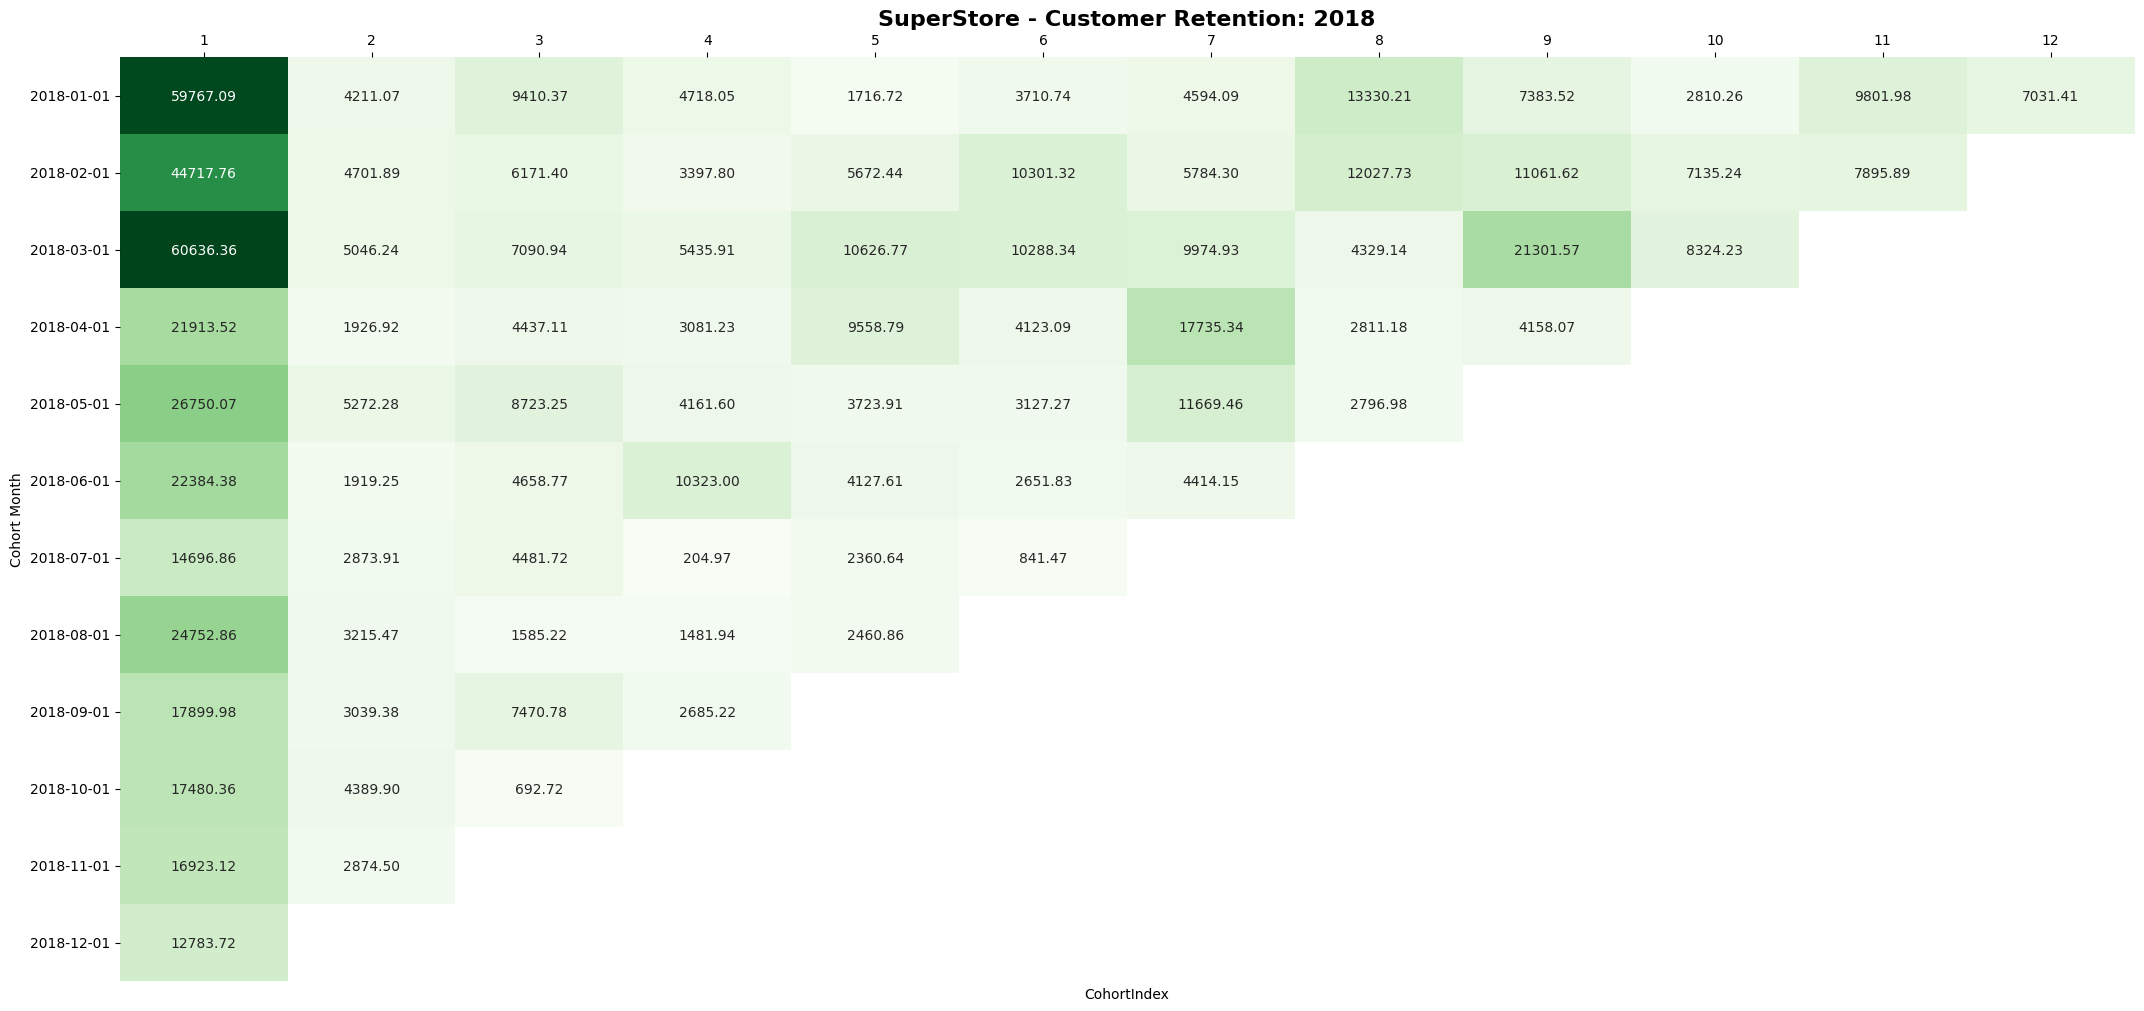

In [36]:
# Show Revenue spents by each cohort

revenue_cohort_df = customer_df.groupby(['Cohort Month', 'CohortIndex'])['Sales'].sum().round(2).reset_index()
revenue_cohort_df['Cohort Month'] = convert_datetostr(revenue_cohort_df, 'Cohort Month')

revenue_table = revenue_cohort_df.pivot(index='Cohort Month', columns=['CohortIndex'], values='Sales')

#plot Revenue
plot_heatmap(revenue_table, True, 'Greens', ".2f")
